# Linear Regression

## Simple Linear Regression

In [140]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [18]:
#Loading the dataset
data = pd.read_csv(r"C:\Users\gunjans648\Desktop\Datasets\Admission_Predict.csv")
data.head(10)

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [19]:
data.describe()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Create the first Regression

In [20]:
#Define the dependent and independent variables
x1 = data['GRE_Score']
y = data['Chance_of_Admit']

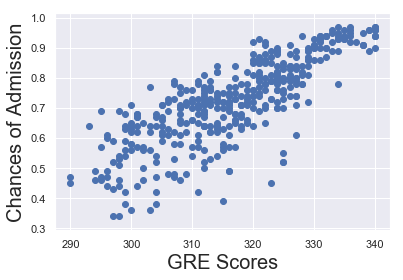

In [21]:
#Plotting the values on a scatter plot
plt.scatter(x1,y)
plt.xlabel('GRE Scores', fontsize = 20)
plt.ylabel('Chances of Admission', fontsize = 20)
plt.show()

In [22]:
x = sm.add_constant(x1.to_numpy())
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     720.6
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.46e-91
Time:                        17:47:27   Log-Likelihood:                 418.65
No. Observations:                 400   AIC:                            -833.3
Df Residuals:                     398   BIC:                            -825.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4361      0.118    -20.677      0.000      -2.668      -2.204
x1             0.0100      0.000     26.843      0.000       0.009       0.011
==============================================================================
Omnibus:                       52.605   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.715
Skew:                          -0.860   Prob(JB):                     1.33e-17
Kurtosis:                       4.307   Cond. No.                     8.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

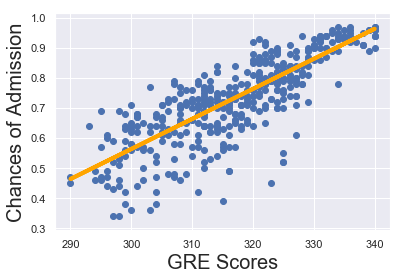

In [23]:
#Plotting the values on a scatter plot
plt.scatter(x1,y)
yhat = 0.0100*x1 - 2.4361
fig = plt.plot(x1, yhat, lw = 4, c='orange', label='regression line')
plt.xlabel('GRE Scores', fontsize = 20)
plt.ylabel('Chances of Admission', fontsize = 20)
plt.show()

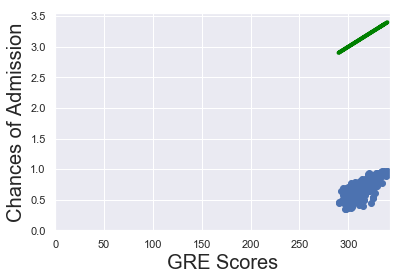

In [24]:
#Plotting the values on a scatter plot
plt.scatter(x1,y)
yhat = 0.0100*x1 + 0
fig = plt.plot(x1, yhat, lw = 4, c='green', label='regression line')
plt.xlabel('GRE Scores', fontsize = 20)
plt.ylabel('Chances of Admission', fontsize = 20)
plt.xlim(0)
plt.ylim(0)
plt.show()

## Multiple Linear Regression and Adjusted R-squared

In [25]:
#Loading the dataset
data = pd.read_csv(r"C:\Users\gunjans648\Desktop\Datasets\Admission_Predict.csv")
data.head(10)

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [26]:
#Considering multiple independent variables for the regression model
#Define the dependent and independent variables
x1 = data[['GRE_Score','TOEFL_Score','CGPA','University_Rating']]
y = data['Chance_of_Admit']

In [27]:
x = sm.add_constant(x1.to_numpy())
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     369.8
Date:                Tue, 11 Aug 2020   Prob (F-statistic):          4.41e-132
Time:                        17:47:28   Log-Likelihood:                 523.39
No. Observations:                 400   AIC:                            -1037.
Df Residuals:                     395   BIC:                            -1017.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4479      0.117    -12.401      0.000      -1.677      -1.218
x1             0.0022      0.001      3.754      0.000       0.001       0.003
x2             0.0026      0.001      2.341      0.020       0.000       0.005
x3             0.1343      0.012     11.250      0.000       0.111       0.158
x4             0.0119      0.004      2.698      0.007       0.003       0.021
==============================================================================
Omnibus:                       93.584   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.790
Skew:                          -1.208   Prob(JB):                     9.22e-45
Kurtosis:                       5.516   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dummy Variables and Regression using Categorical data

In [28]:
#Loading the dataset, 
raw_data = pd.read_csv(r"C:\Users\gunjans648\Desktop\Datasets\CategoricalData.csv", skipinitialspace=False)
raw_data.head(10)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


In [29]:
data = raw_data.copy()

In [30]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})
data.head(5)

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [31]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [32]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [226]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           2.19e-15
Time:                        02:30:15   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plotting the regression line(s) on the scatter plot

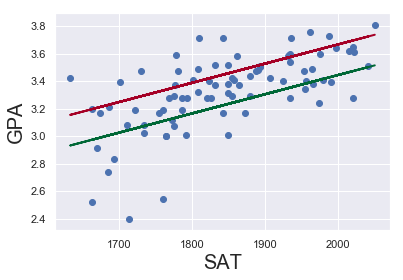

In [34]:
# Creating a scatter plot of SAT and GPA
plt.scatter(data['SAT'],y)
# The two regression equations, depending on whether they attended (yes), or didn't (no)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
# Plot the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
# Name your axes :)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Plotting the regression line(s) on the scatter plot and color the data points


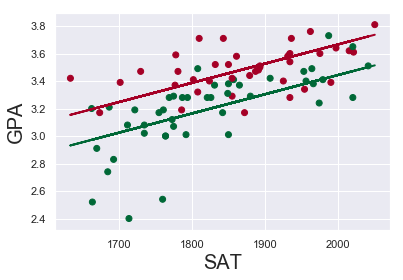

In [35]:
# Creating one scatter plot which contains all observations
# Using the series 'Attendance' as color
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

# Defining the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

# Plot the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Adding the original regression line for comparison

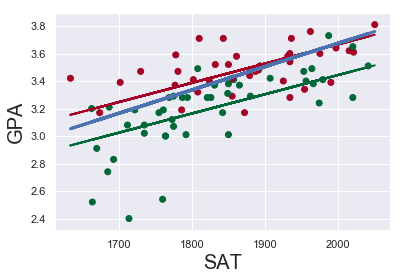

In [36]:
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
# Original regression line
yhat = 0.0017*data['SAT'] + 0.275

# Plot the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837', label ='regression line1')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026', label ='regression line2')
# Plot the original regression line
fig = plt.plot(data['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Predictions using Regression Model

In [37]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [38]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.19e-15
Time:                        17:47:28   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
x.head(5)

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0


In [40]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [41]:
new_data.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [42]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [43]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined

,const,SAT,Attendance,Predictions
0,1,1700,0,3.023513
1,1,1670,1,3.204163


In [44]:
joined.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


## Simple Linear Regresiion using sklearn

In [83]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [46]:
#Loading the dataset
data = pd.read_csv(r"C:\Users\gunjans648\Desktop\Datasets\1.03. SLR.csv")
data.head(5)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [47]:
#x is an input variable called feature
x = data['SAT']
#y is a dependant variable and is called the target
y = data['GPA']

In [48]:
x.shape

(84,)

In [49]:
y.shape

(84,)

In [75]:
#Reshaping the x from 1-D to 2-D
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

array([[1714]], dtype=int64)

## Regression itself

In [51]:
#creating an instance of the LinearRegression class
reg = LinearRegression()

In [52]:
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## R- squared

In [53]:
reg.score(x_matrix,y)

0.40600391479679765

## Coefficients

In [54]:
reg.coef_

array([0.00165569])

## Intercepts

In [55]:
reg.intercept_

0.2750402996602803

## Predictions

In [76]:
reg.predict(x_matrix[[0]])

array([3.11288962])

In [77]:
new_data = pd.DataFrame(data=[1740,1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [78]:
arr = reg.predict(new_data)
arr

array([3.15593751, 3.18905127])

In [79]:
new_arr = arr.reshape(-1,1)
new_arr

array([[3.15593751],
       [3.18905127]])

In [82]:
new_data['Predicted_GPA'] = reg.predict(new_arr)
new_data

,SAT,Predicted_GPA,Predicted GPA
0,1740,0.280266,0.280266
1,1760,0.280320,0.280320


## Multiple Linear Regression with sklearn

In [101]:
#Loading the dataset
data = pd.read_csv(r"C:\Users\gunjans648\Desktop\Datasets\1.02.+Multiple+linear+regression.csv")
data.head(5)

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [85]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [114]:
#Considering multiple independent variables for the regression model
#Define the dependent and independent variables
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

## Regression itself

In [115]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [117]:
reg.intercept_

0.29603261264909486

## Calculating the R squared

In [118]:
reg.score(x,y)

0.4066811952814285

## Formulae for adjusted R-squared
#### adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
##### n = number of observations/ p = number of predictors

In [119]:
x.shape

(84, 2)

In [120]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))
adjusted_r2

0.39203134825134023

## Feature Selection with F-Regression

##### Feature selection = How to detect the variables that are unneeded ina model. That is using feature selection. It simplifies the models and improve the speed of the model. P value is used in a statsmodel to check if a feature is needed or not. A value of 0.05 or greater indicates that the feature is not helping in the model.   

##### feature_selection.f_regression - is a module of sklearn that creates simple linear regressions of each feature and the dependent variable.

In [121]:
from sklearn.feature_selection import f_regression

In [128]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [132]:
## f_statistic = f_regression(x,y)[0]
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [133]:
p_values.round(3)

array([0.   , 0.676])

## Creating a summary table 

In [142]:
reg_summary = pd.DataFrame(data = x.columns.values, columns = ['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [143]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


### Feature Scaling/ Standardization/ Normalization
###### x' = (x - μ) / σ

###### normalization and standardization are sometimes used interchangeably, but they usually refer to different things. Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1. This standardization is called a z-score, and data points can be standardized with the following formula x' = (x - μ) / σ   , μ is the mean of the sample and σ is the standard deviation

In [146]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()

In [151]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [152]:
## it will transform all the scaled inputs using the information scaled in the scaler object
x_scaled = scaler.transform(x)

In [157]:
x_scaled[0]

array([-1.26338288, -1.24637147])

## Regression with scaled features

In [159]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [160]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [161]:
reg.intercept_

3.330238095238095

## Creating a Summary Table with the scaled inputs

In [167]:
#Bias - ML word for Intercept, Weights - ML word for coefficients
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']], columns= ['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [168]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


## Predictions using the standardized coefficients (weights)

In [169]:
new_data = pd.DataFrame(data = [[1700,2], [1800,1]], columns=['SAT','Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [170]:
reg.predict(new_data)

array([295.39979563, 312.58821497])

In [221]:
new_data_scaled = scaler.transform(new_data).reshape(-1,1)
new_data_scaled

array([[-1.39811928],
       [-0.07002087],
       [-0.43571643],
       [-1.24637147]])

In [222]:
reg.predict(new_data_scaled).reshape(-1,1)

array([[3.08970998],
       [3.31819192],
       [3.25527879],
       [3.11581621]])

## What if we removed the 'Rand 1,2,3' variable feature

In [223]:
reg_simple = LinearRegression()

In [224]:
x_simple_matrix = x_scaled[:,0].reshape(-1,1)
reg_simple.fit(x_simple_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [225]:
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.31819192, 3.25527879, 3.11581621])

###### Note - The GPA's are almost similar to the SAT scores if we dont consider the 'Rand 1, 2,3' feature

## Train Test Split

In [228]:
#Importing the relevant libraries
import numpy as np
from sklearn.model_selection import train_test_split

In [231]:
#Generating some data we are going to split 
a = np.arange(1,101)
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [233]:
b = np.arange(501,601)
b

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600])

### Split the data

In [234]:
train_test_split(a)

[array([ 83,  78,   4,  90,  46,   1,  60,  96,   3,  41,  68,  77,  50,
         20,  23,  86,  24,  67,   7,  76,  19,  75,  79,  52,   8,  27,
         11, 100,  33,  64,  34,  40,  63,  16,  13,  84,  21,  26,  29,
         74,  80,   5,  85,  39,  12,  51,  97,  71,  87,  69,  72,  25,
         93,   6,  56,  66,  17,  92,  35,  10,  65,  14,  91,  31,  62,
         88,  28,  95,  18,  22,  38,  94,  53,  44,  58]),
 array([ 2, 43, 59, 55, 32, 30, 82, 45, 15, 73,  9, 36, 47, 37, 70, 57, 61,
        42, 98, 81, 49, 54, 89, 99, 48])]

In [259]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, shuffle=True, random_state=42)

### Exploring the results

In [256]:
#The default split size is of a 75, 25
a_train.shape, a_test.shape

((80,), (20,))

In [257]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [258]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

In [260]:
b_train.shape, b_test.shape

((80,), (20,))

In [261]:
b_train

array([556, 589, 527, 543, 570, 516, 541, 597, 510, 573, 512, 548, 586,
       529, 594, 506, 567, 566, 536, 517, 550, 535, 508, 596, 528, 520,
       582, 526, 563, 514, 525, 504, 518, 539, 509, 579, 507, 565, 537,
       590, 557, 600, 555, 544, 551, 568, 547, 569, 562, 598, 580, 542,
       559, 549, 599, 558, 576, 533, 595, 560, 564, 585, 538, 530, 502,
       553, 522, 503, 524, 588, 592, 575, 587, 583, 521, 561, 572, 515,
       593, 552])

In [262]:
b_test

array([584, 554, 571, 546, 545, 540, 523, 581, 511, 501, 519, 531, 574,
       534, 591, 505, 577, 578, 513, 532])

# Real-Life Example 1

### Importing the relevant libraries

In [263]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Loading the raw data

In [267]:
raw_data = pd.read_csv(r"C:\Users\gunjans648\Desktop\Datasets\1.04. Real-life example.csv")
raw_data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

##### Exploring the descriptive statistics of the variables

In [268]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [271]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with the missing values

In [273]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [278]:
data_no_mv = data.dropna(axis=0)

In [279]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [280]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDF's

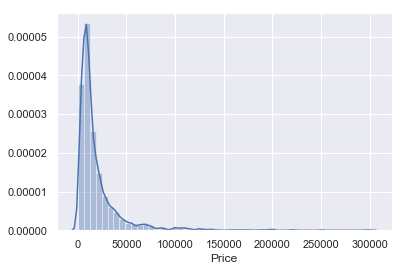

In [282]:
sns.distplot(data_no_mv['Price'])
#Note - For optimal results, we would be looking for a normal distribution.But we can see here the exponential rise

### Deal with outliers

###### Outliers - that lie on an abnormal distance from the observations in the data. One way to deal with outliers is to remove the top 1% of observations

In [285]:
q = data_no_mv['Price'].quantile(0.99)
q

129812.51999999981

In [288]:
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


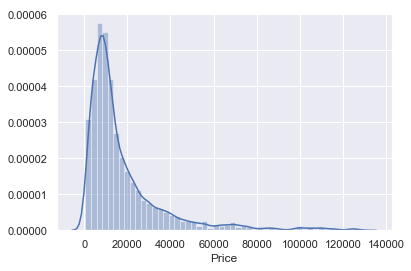

In [289]:
sns.distplot(data_1['Price'])

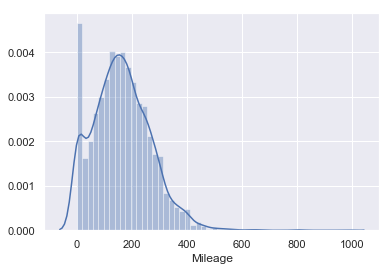

In [290]:
sns.distplot(data_no_mv['Mileage'])

In [291]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


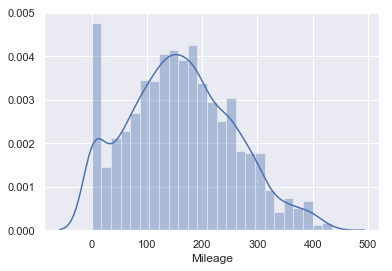

In [292]:
sns.distplot(data_2['Mileage'])

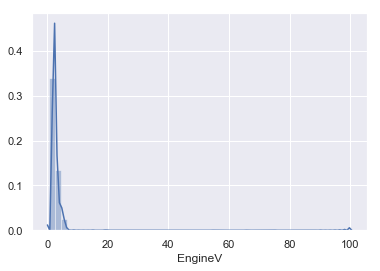

In [307]:
sns.distplot(data_no_mv['EngineV'])

In [308]:
data_3 = data_2[data_2['EngineV']<6.5]

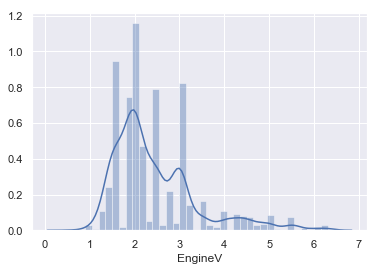

In [309]:
sns.distplot(data_3['EngineV'])

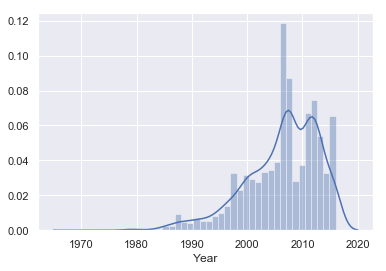

In [310]:
sns.distplot(data_no_mv['Year'])

In [314]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

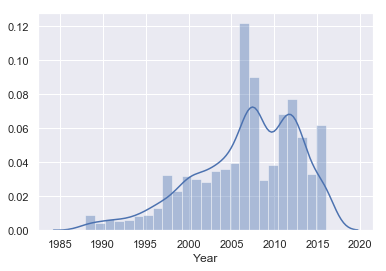

In [315]:
sns.distplot(data_4['Year'])

In [316]:
data_cleaned = data_4.reset_index(drop=True)

In [317]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Check the OLS Assumptions

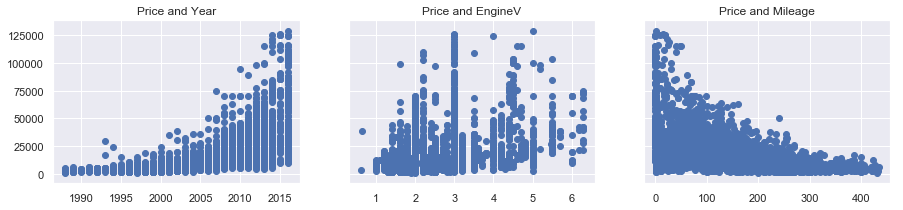

In [318]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

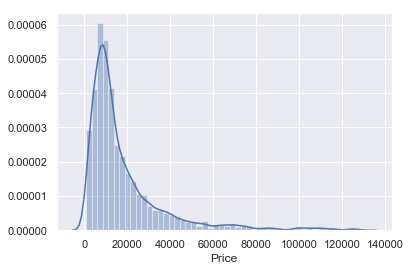

In [319]:
sns.distplot(data_cleaned['Price'])

##### Relaxing the assumptions

In [322]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,9.560997
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,9.287209
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,7.244228
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,9.388487
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,7.824046


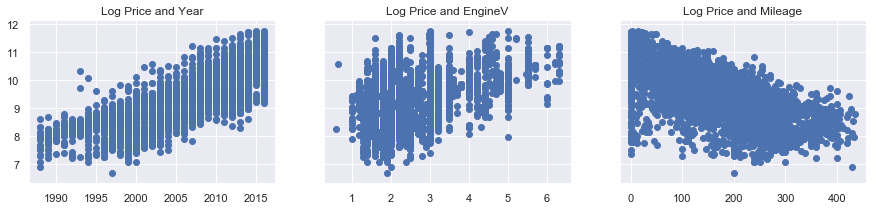

In [324]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [328]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

KeyError: "['Price'] not found in axis"

##### Multicollinearity

In [329]:
data_cleaned.columns.values
#Year and Mileage could be co-related. If the model is older then the mileage would alos be lower.

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [330]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Defining variables to check for multicollinearity
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [331]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


##### Note : If VIF = 1 (NO multicollinearity) / 1< VIF < 5 (Perfectly okay) / VIF>5 (NOT unacceptable)

In [332]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

### Creating Dummy Variables

##### Note - If we have N categories of a feature then we should create (n-1) dummies

In [334]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [335]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearranging a bit

In [336]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [337]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [338]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Linear Regression Model

##### Deaclaring the inputs and the targets

In [339]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

##### Scaling the data

In [340]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [341]:
inputs_scaled = scaler.transform(inputs)

##### Train Test Split

In [342]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, shuffle=True, random_state=365)

##### Create the resgression

In [354]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [355]:
y_hat = reg.predict(x_train)

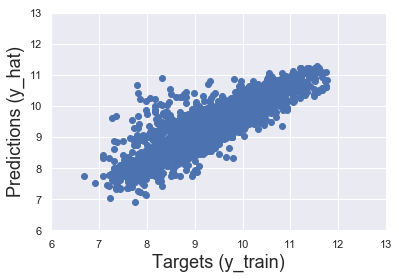

In [356]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

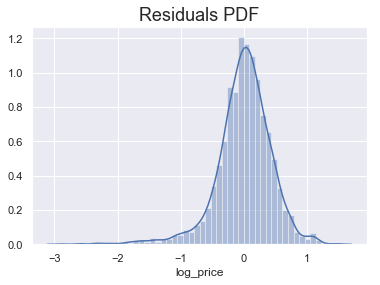

In [357]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

##### Residuals = Diff. b/w the targets and the predictions. There are certain observations for which (y_train - y_hat) is much lower than the mean that means (a much higher price is predicted than it is observed)

In [358]:
reg.score(x_train, y_train)

0.744996578792662

### FInding the weights(coefficients) and bias(intercept)

In [359]:
reg.intercept_

9.415239458021299

In [360]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [362]:
#Bias - ML word for Intercept, Weights - ML word for coefficients
reg_summary = pd.DataFrame(inputs.columns.values, columns= ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [364]:
#If all the dummies are 0, then the brand that was left 'Audi' is 1. So Audi is the benchmark.
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

###### Note - A positive weight shows that the respective category (Brand) is more expensive than the Benchmark (Audi)
###### A negative weight shows that the respective category (Brand) is less expensive than the Benchmark (Audi)

### Testing

In [365]:
y_hat_test = reg.predict(x_test)

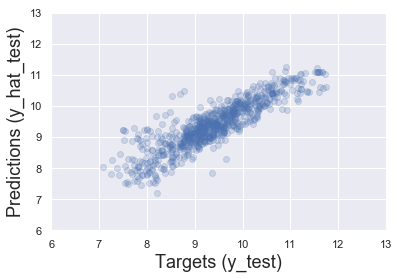

In [367]:
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [370]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [371]:
df_pf['Targets']= np.exp(y_test)
df_pf.head()

,Predictions,Targets
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


In [374]:
y_test.head(10)

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
2855     9.903488
167     10.568441
2995     9.740910
3768     9.433484
3304    10.621327
Name: log_price, dtype: float64

In [375]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [377]:
df_pf['Targets']= np.exp(y_test)
df_pf.head(10)

,Predictions,Targets
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
5,21289.799394,20000.0
6,20159.189144,38888.0
7,20349.617702,16999.0
8,11581.537864,12500.0
9,33614.617349,41000.0


In [379]:
df_pf['Residual'] = df_pf['Targets'] - df_pf['Predictions']
df_pf.head()

,Predictions,Targets,Residual
0,10685.501696,2300.0,-8385.501696
1,3499.255242,2800.0,-699.255242
2,7553.285218,2500.0,-5053.285218
3,7463.963017,6400.0,-1063.963017
4,11353.490075,9150.0,-2203.490075


In [381]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Targets'] * 100)

In [382]:
df_pf.describe()

,Predictions,Targets,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [384]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Targets,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
